In [12]:
"""
Nilearn Visualization for Brain Region Classification Error Map
================================================================
This script visualizes which brain regions were misclassified during the 
gender task, mapping errors onto actual brain anatomy.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting, datasets
from nilearn.connectome import ConnectivityMeasure
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("="*70)
print("NILEARN BRAIN VISUALIZATION - ERROR MAP ANALYSIS")
print("="*70)


NILEARN BRAIN VISUALIZATION - ERROR MAP ANALYSIS


In [3]:

# ============================================================================
# STEP 1: Load Error Map Results
# ============================================================================
print("\n[1/6] Loading error map data...")

# Load the error map CSV generated from previous analysis
error_map_df = pd.read_csv('error_map_piop1.csv')

print(f"   • Total regions: {len(error_map_df)}")
print(f"   • Mean misclassification rate: {error_map_df['misclassification_rate'].mean():.4f}")



[1/6] Loading error map data...
   • Total regions: 232
   • Mean misclassification rate: 0.3030


In [4]:

# ============================================================================
# STEP 2: Parse Region Information
# ============================================================================
print("\n[2/6] Parsing region anatomical information...")

# Extract hemisphere and network information from region names
def parse_region_info(region_name):
    """Extract hemisphere, network, and subregion from region name"""
    parts = region_name.split('_')
    
    hemisphere = 'Left' if region_name.startswith('LH_') else 'Right' if region_name.startswith('RH_') else 'Unknown'
    
    # Common network abbreviations
    network_map = {
        'Vis': 'Visual',
        'VisCent': 'Visual Central',
        'VisPeri': 'Visual Peripheral',
        'SomMot': 'Somatomotor',
        'DorsAttn': 'Dorsal Attention',
        'SalVentAttn': 'Salience/Ventral Attention',
        'Limbic': 'Limbic',
        'Cont': 'Control',
        'Default': 'Default Mode',
        'Temp': 'Temporal',
        'Par': 'Parietal',
        'Front': 'Frontal'
    }
    
    network = 'Other'
    for key, value in network_map.items():
        if key in region_name:
            network = value
            break
    
    return hemisphere, network

error_map_df['hemisphere'] = error_map_df['region_name'].apply(lambda x: parse_region_info(x)[0])
error_map_df['network'] = error_map_df['region_name'].apply(lambda x: parse_region_info(x)[1])



[2/6] Parsing region anatomical information...


In [5]:

# ============================================================================
# STEP 3: Network-Level Analysis
# ============================================================================
print("\n[3/6] Analyzing errors by brain networks...")

# Group by network
network_errors = error_map_df.groupby('network').agg({
    'misclassification_rate': ['mean', 'std', 'count']
}).round(4)

network_errors.columns = ['mean_error', 'std_error', 'n_regions']
network_errors = network_errors.sort_values('mean_error', ascending=False)

print("\nMisclassification Rate by Brain Network:")
print(network_errors)

# Group by hemisphere
hemisphere_errors = error_map_df.groupby('hemisphere').agg({
    'misclassification_rate': ['mean', 'std', 'count']
}).round(4)

hemisphere_errors.columns = ['mean_error', 'std_error', 'n_regions']

print("\nMisclassification Rate by Hemisphere:")
print(hemisphere_errors)


[3/6] Analyzing errors by brain networks...

Misclassification Rate by Brain Network:
                            mean_error  std_error  n_regions
network                                                     
Other                           0.4953     0.1123         32
Temporal                        0.3600     0.0913          6
Limbic                          0.2954     0.0952         14
Somatomotor                     0.2893     0.1353         34
Dorsal Attention                0.2766     0.1157         22
Control                         0.2746     0.1212         37
Salience/Ventral Attention      0.2633     0.1184         26
Default Mode                    0.2568     0.0863         37
Visual                          0.2381     0.0839         24

Misclassification Rate by Hemisphere:
            mean_error  std_error  n_regions
hemisphere                                  
Left            0.2780     0.1006        100
Right           0.2663     0.1210        100
Unknown         0.4953 

In [9]:

# ============================================================================
# STEP 4: Identify Top Altered Regions
# ============================================================================
print("\n[4/6] Identifying most altered brain regions...")

# Define thresholds
HIGH_ERROR_THRESHOLD = 0.3  # 30% error rate
LOW_ERROR_THRESHOLD = 0.1   # 10% error rate

high_error_regions = error_map_df[error_map_df['misclassification_rate'] > HIGH_ERROR_THRESHOLD]
low_error_regions = error_map_df[error_map_df['misclassification_rate'] < LOW_ERROR_THRESHOLD]

print(f"\n   • High error regions (>30%): {len(high_error_regions)}")
print(f"   • Low error regions (<10%): {len(low_error_regions)}")

print("\nTop 10 Most Altered Regions:")
print(error_map_df[['region_name', 'misclassification_rate', 'network']].head(10).to_string(index=False))

print("\nTop 10 Most Stable Regions:")
print(error_map_df[['region_name', 'misclassification_rate', 'network']].tail(10).to_string(index=False))



[4/6] Identifying most altered brain regions...

   • High error regions (>30%): 106
   • Low error regions (<10%): 10

Top 10 Most Altered Regions:
    region_name  misclassification_rate     network
        mAMY-rh                   0.725       Other
         aGP-rh                   0.710       Other
         aGP-lh                   0.705       Other
RH_SomMotB_S2_1                   0.655 Somatomotor
   NAc-shell-lh                   0.635       Other
         pGP-lh                   0.630       Other
      THA-DP-rh                   0.610       Other
        lAMY-rh                   0.590       Other
         pGP-rh                   0.585       Other
   NAc-shell-rh                   0.575       Other

Top 10 Most Stable Regions:
             region_name  misclassification_rate                    network
    RH_VisPeri_StriCal_1                   0.100                     Visual
       RH_DefaultC_Rsp_1                   0.100               Default Mode
       RH_SomMotB_Cen


[5/6] Creating comprehensive visualizations...
✓ Saved: nilearn_error_analysis_comprehensive.png


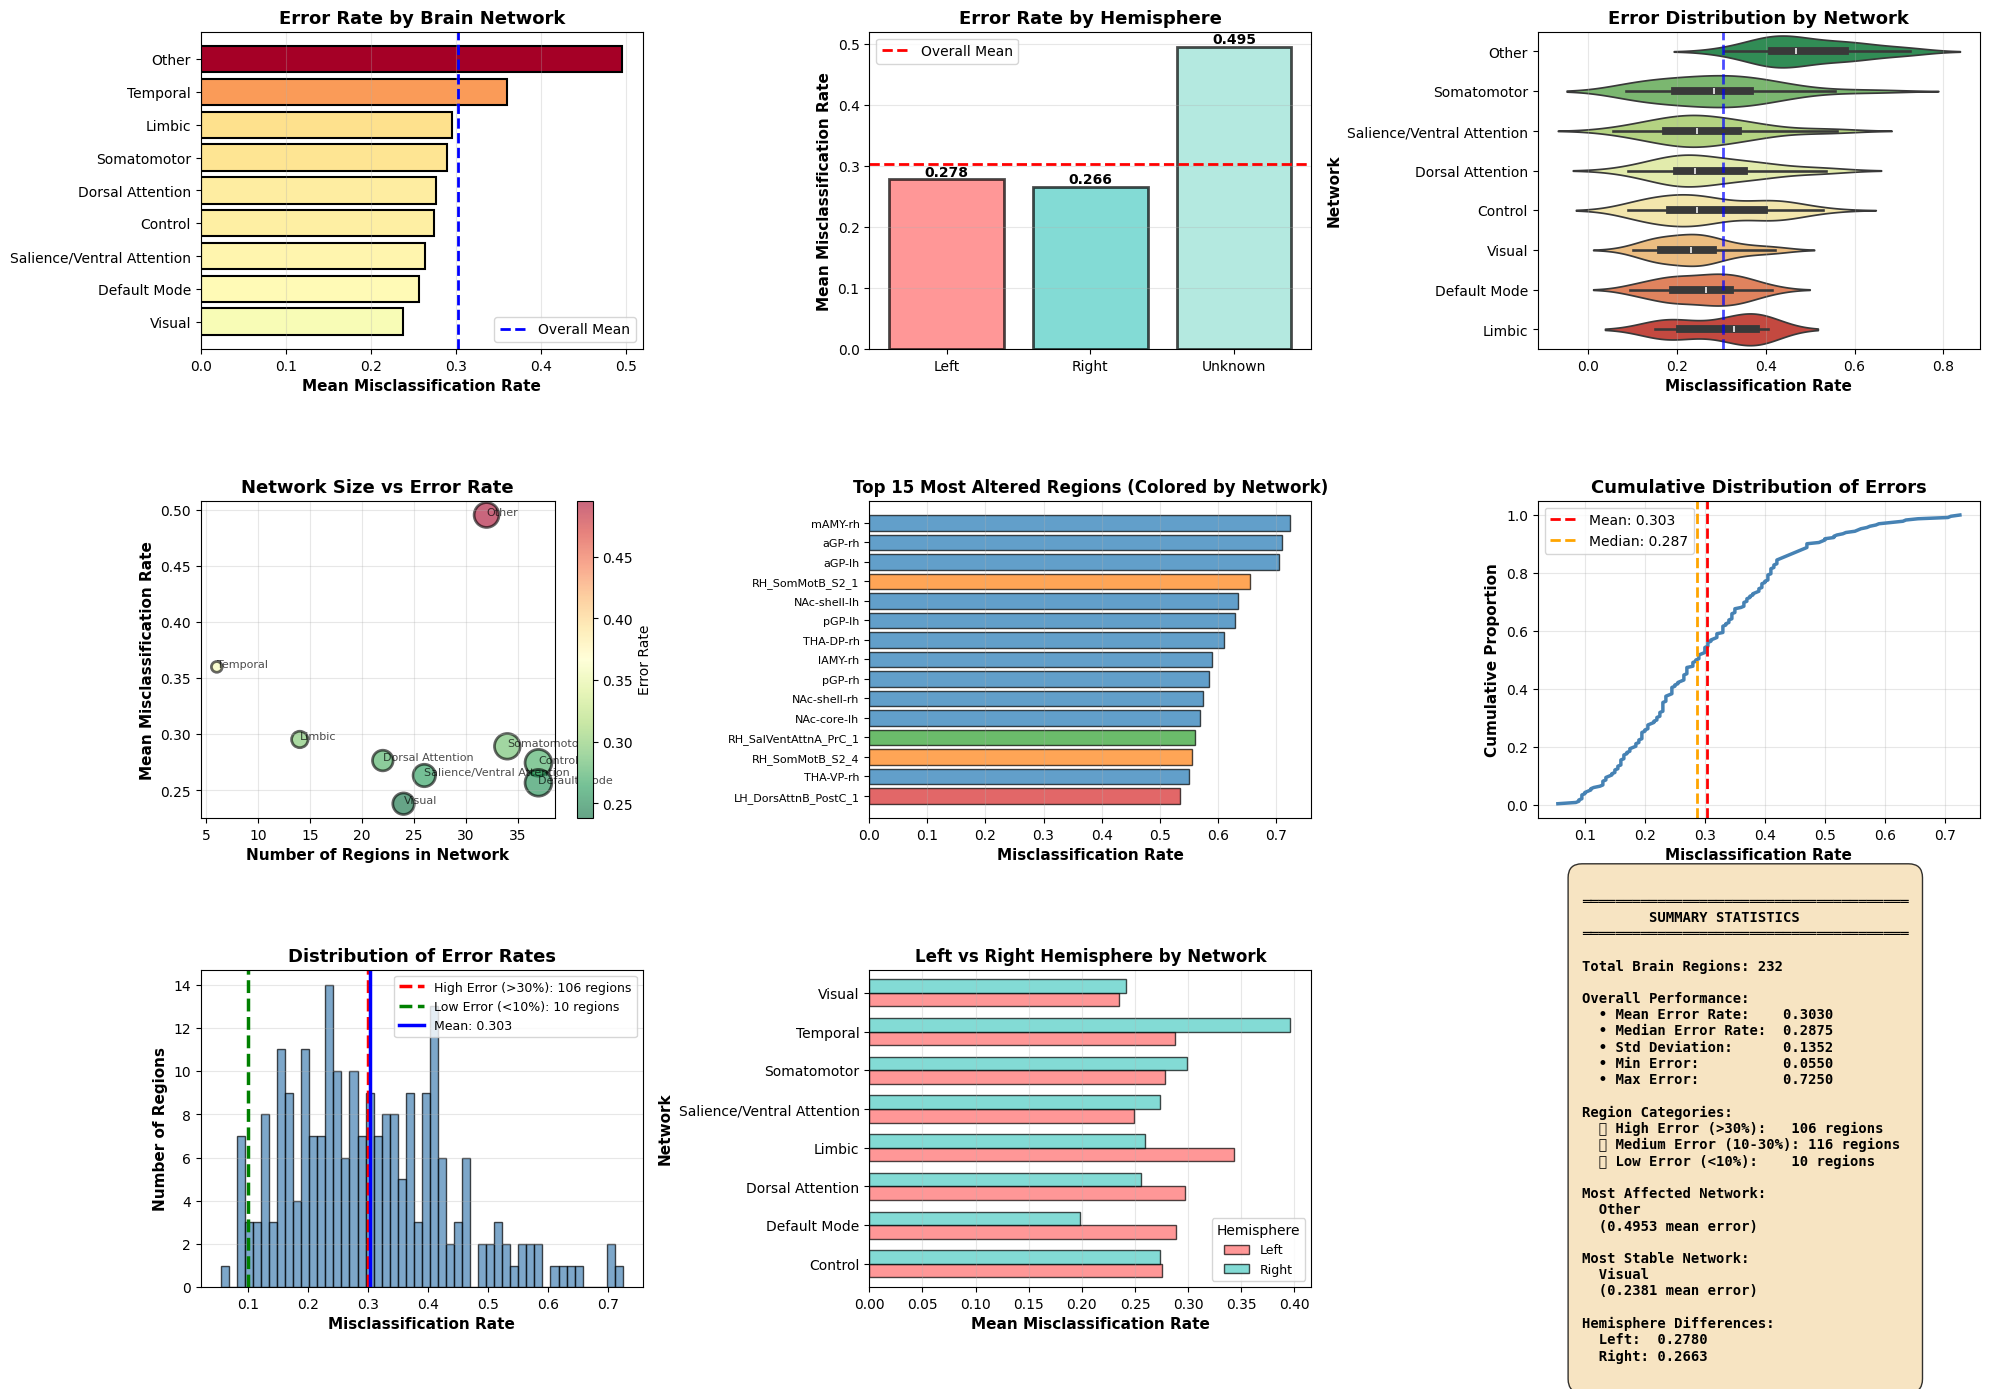

In [13]:

# ============================================================================
# STEP 5: Advanced Visualizations
# ============================================================================
print("\n[5/6] Creating comprehensive visualizations...")

fig = plt.figure(figsize=(20, 14))

# Plot 1: Network-level error comparison
ax1 = plt.subplot(3, 3, 1)
network_errors_sorted = network_errors.sort_values('mean_error', ascending=True)
colors = plt.cm.RdYlGn_r(network_errors_sorted['mean_error'] / network_errors_sorted['mean_error'].max())
bars = ax1.barh(range(len(network_errors_sorted)), network_errors_sorted['mean_error'], 
                color=colors, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(network_errors_sorted)))
ax1.set_yticklabels(network_errors_sorted.index, fontsize=10)
ax1.set_xlabel('Mean Misclassification Rate', fontsize=11, fontweight='bold')
ax1.set_title('Error Rate by Brain Network', fontsize=13, fontweight='bold')
ax1.axvline(error_map_df['misclassification_rate'].mean(), color='blue', 
            linestyle='--', linewidth=2, label='Overall Mean')
ax1.legend()
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Hemisphere comparison
ax2 = plt.subplot(3, 3, 2)
hemisphere_data = error_map_df.groupby('hemisphere')['misclassification_rate'].mean()
colors_hemi = ['#FF6B6B', '#4ECDC4', '#95E1D3']
bars2 = ax2.bar(hemisphere_data.index, hemisphere_data.values, color=colors_hemi, 
                edgecolor='black', linewidth=2, alpha=0.7)
ax2.set_ylabel('Mean Misclassification Rate', fontsize=11, fontweight='bold')
ax2.set_title('Error Rate by Hemisphere', fontsize=13, fontweight='bold')
ax2.axhline(error_map_df['misclassification_rate'].mean(), color='red', 
            linestyle='--', linewidth=2, label='Overall Mean')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Error distribution by network (violin plot)
ax3 = plt.subplot(3, 3, 3)
networks_with_data = error_map_df[error_map_df['network'].isin(
    error_map_df['network'].value_counts().head(8).index
)]
sns.violinplot(data=networks_with_data, y='network', x='misclassification_rate', 
               ax=ax3, palette='RdYlGn_r')
ax3.set_xlabel('Misclassification Rate', fontsize=11, fontweight='bold')
ax3.set_ylabel('Network', fontsize=11, fontweight='bold')
ax3.set_title('Error Distribution by Network', fontsize=13, fontweight='bold')
ax3.axvline(error_map_df['misclassification_rate'].mean(), color='blue', 
            linestyle='--', linewidth=2, alpha=0.7)
ax3.grid(axis='x', alpha=0.3)

# Plot 4: Network size vs error rate
ax4 = plt.subplot(3, 3, 4)
network_summary = error_map_df.groupby('network').agg({
    'misclassification_rate': 'mean',
    'region_name': 'count'
}).reset_index()
network_summary.columns = ['network', 'mean_error', 'n_regions']

scatter = ax4.scatter(network_summary['n_regions'], network_summary['mean_error'], 
                     s=network_summary['n_regions']*10, alpha=0.6, 
                     c=network_summary['mean_error'], cmap='RdYlGn_r',
                     edgecolors='black', linewidth=2)

for idx, row in network_summary.iterrows():
    ax4.annotate(row['network'], (row['n_regions'], row['mean_error']), 
                fontsize=8, alpha=0.7)

ax4.set_xlabel('Number of Regions in Network', fontsize=11, fontweight='bold')
ax4.set_ylabel('Mean Misclassification Rate', fontsize=11, fontweight='bold')
ax4.set_title('Network Size vs Error Rate', fontsize=13, fontweight='bold')
ax4.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Error Rate')

# Plot 5: Top altered regions by network
ax5 = plt.subplot(3, 3, 5)
top_altered = error_map_df.nlargest(15, 'misclassification_rate')
network_colors = {net: plt.cm.tab10(i) for i, net in enumerate(top_altered['network'].unique())}
colors_list = [network_colors[net] for net in top_altered['network']]

bars5 = ax5.barh(range(len(top_altered)), top_altered['misclassification_rate'], 
                 color=colors_list, edgecolor='black', alpha=0.7)
ax5.set_yticks(range(len(top_altered)))
ax5.set_yticklabels([name[:40] for name in top_altered['region_name']], fontsize=8)
ax5.set_xlabel('Misclassification Rate', fontsize=11, fontweight='bold')
ax5.set_title('Top 15 Most Altered Regions (Colored by Network)', fontsize=12, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

# Plot 6: Cumulative error distribution
ax6 = plt.subplot(3, 3, 6)
sorted_errors = np.sort(error_map_df['misclassification_rate'].values)
cumulative = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
ax6.plot(sorted_errors, cumulative, linewidth=2.5, color='steelblue')
ax6.axvline(error_map_df['misclassification_rate'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f'Mean: {error_map_df["misclassification_rate"].mean():.3f}')
ax6.axvline(error_map_df['misclassification_rate'].median(), color='orange', 
            linestyle='--', linewidth=2, label=f'Median: {error_map_df["misclassification_rate"].median():.3f}')
ax6.set_xlabel('Misclassification Rate', fontsize=11, fontweight='bold')
ax6.set_ylabel('Cumulative Proportion', fontsize=11, fontweight='bold')
ax6.set_title('Cumulative Distribution of Errors', fontsize=13, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

# Plot 7: Error rate histogram with thresholds
ax7 = plt.subplot(3, 3, 7)
ax7.hist(error_map_df['misclassification_rate'], bins=50, alpha=0.7, 
         color='steelblue', edgecolor='black')
ax7.axvline(HIGH_ERROR_THRESHOLD, color='red', linestyle='--', linewidth=2.5, 
            label=f'High Error (>{HIGH_ERROR_THRESHOLD:.0%}): {len(high_error_regions)} regions')
ax7.axvline(LOW_ERROR_THRESHOLD, color='green', linestyle='--', linewidth=2.5,
            label=f'Low Error (<{LOW_ERROR_THRESHOLD:.0%}): {len(low_error_regions)} regions')
ax7.axvline(error_map_df['misclassification_rate'].mean(), color='blue', 
            linestyle='-', linewidth=2.5, label=f'Mean: {error_map_df["misclassification_rate"].mean():.3f}')
ax7.set_xlabel('Misclassification Rate', fontsize=11, fontweight='bold')
ax7.set_ylabel('Number of Regions', fontsize=11, fontweight='bold')
ax7.set_title('Distribution of Error Rates', fontsize=13, fontweight='bold')
ax7.legend(fontsize=9)
ax7.grid(axis='y', alpha=0.3)

# Plot 8: Left vs Right hemisphere comparison
ax8 = plt.subplot(3, 3, 8)
left_right_data = error_map_df[error_map_df['hemisphere'].isin(['Left', 'Right'])]
network_hemi = left_right_data.groupby(['network', 'hemisphere'])['misclassification_rate'].mean().unstack()

if not network_hemi.empty:
    network_hemi.plot(kind='barh', ax=ax8, color=['#FF6B6B', '#4ECDC4'], 
                     edgecolor='black', alpha=0.7, width=0.7)
    ax8.set_xlabel('Mean Misclassification Rate', fontsize=11, fontweight='bold')
    ax8.set_ylabel('Network', fontsize=11, fontweight='bold')
    ax8.set_title('Left vs Right Hemisphere by Network', fontsize=12, fontweight='bold')
    ax8.legend(title='Hemisphere', fontsize=9)
    ax8.grid(axis='x', alpha=0.3)

# Plot 9: Summary statistics box
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

summary_stats = f"""
═══════════════════════════════════════
        SUMMARY STATISTICS
═══════════════════════════════════════

Total Brain Regions: {len(error_map_df)}

Overall Performance:
  • Mean Error Rate:    {error_map_df['misclassification_rate'].mean():.4f}
  • Median Error Rate:  {error_map_df['misclassification_rate'].median():.4f}
  • Std Deviation:      {error_map_df['misclassification_rate'].std():.4f}
  • Min Error:          {error_map_df['misclassification_rate'].min():.4f}
  • Max Error:          {error_map_df['misclassification_rate'].max():.4f}

Region Categories:
  🔴 High Error (>30%):   {len(high_error_regions)} regions
  🟡 Medium Error (10-30%): {len(error_map_df[(error_map_df['misclassification_rate'] >= 0.1) & (error_map_df['misclassification_rate'] <= 0.3)])} regions
  🟢 Low Error (<10%):    {len(low_error_regions)} regions

Most Affected Network:
  {network_errors.index[0]}
  ({network_errors.iloc[0]['mean_error']:.4f} mean error)

Most Stable Network:
  {network_errors.index[-1]}
  ({network_errors.iloc[-1]['mean_error']:.4f} mean error)

Hemisphere Differences:
  Left:  {error_map_df[error_map_df['hemisphere']=='Left']['misclassification_rate'].mean():.4f}
  Right: {error_map_df[error_map_df['hemisphere']=='Right']['misclassification_rate'].mean():.4f}
"""

ax9.text(0.1, 0.5, summary_stats, fontsize=10, family='monospace',
         verticalalignment='center', fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, pad=1))

plt.tight_layout()
plt.savefig('nilearn_error_analysis_comprehensive.png', dpi=300, bbox_inches='tight')
print("✓ Saved: nilearn_error_analysis_comprehensive.png")



[6/6] Creating brain atlas visualization...
✓ Saved: nilearn_brain_network_map.png


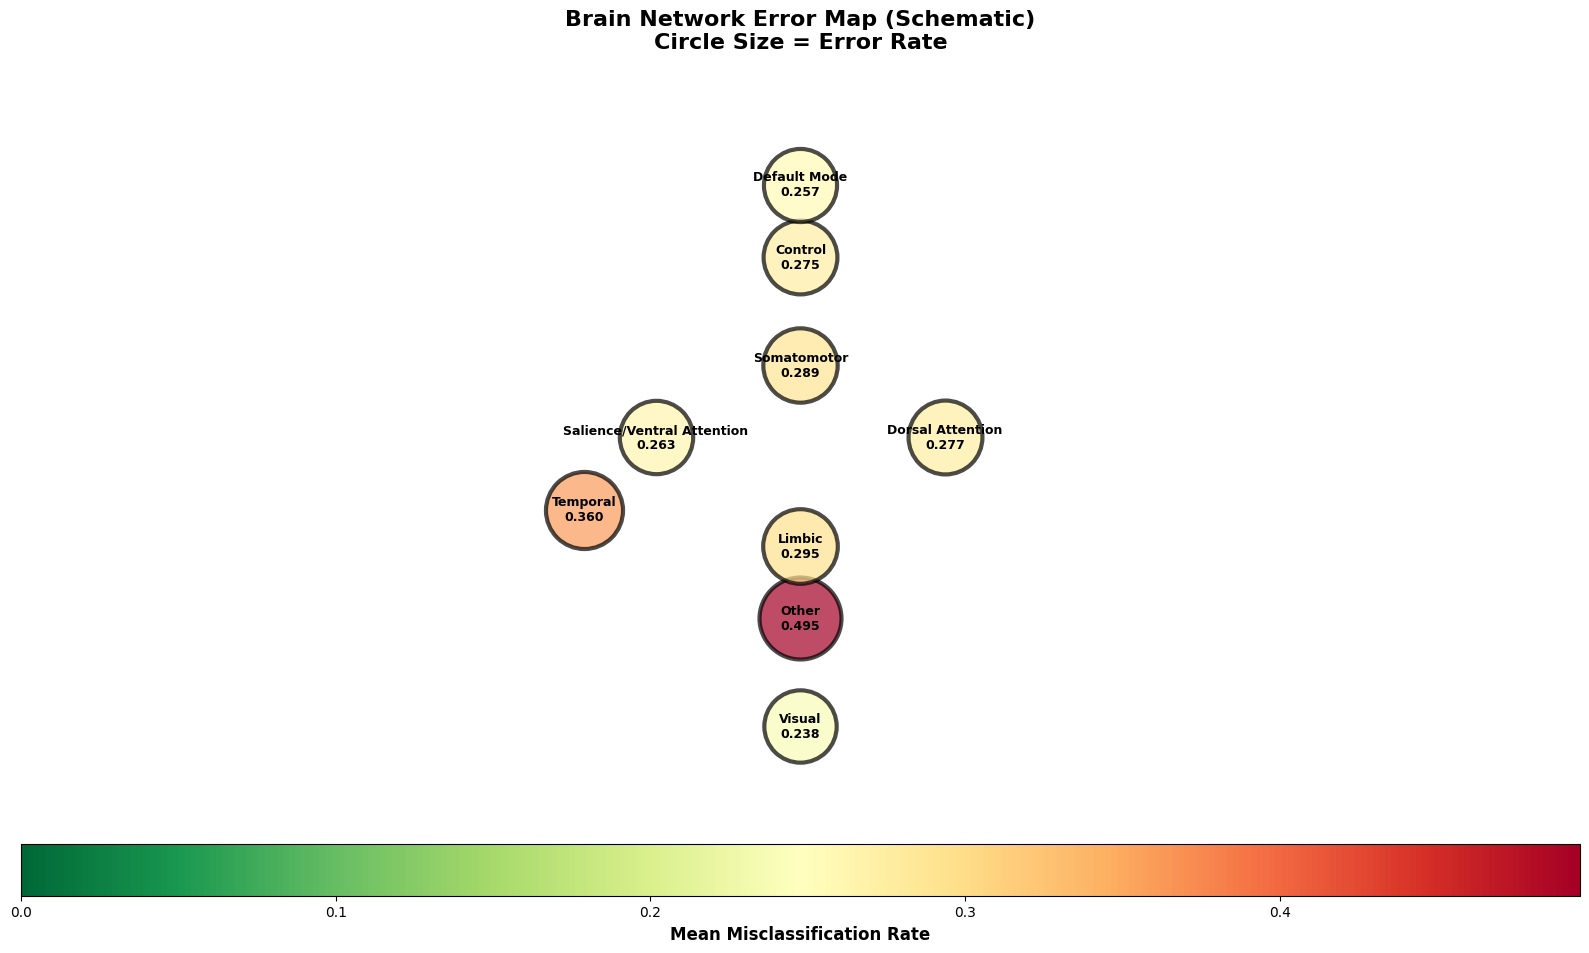

In [14]:

# ============================================================================
# STEP 6: Brain Atlas Visualization (Schematic)
# ============================================================================
print("\n[6/6] Creating brain atlas visualization...")

fig2 = plt.figure(figsize=(16, 10))

# Create a simplified brain map showing error rates by network
ax_brain = plt.subplot(1, 1, 1)

# Create network positions (simulated brain layout)
network_positions = {
    'Visual': (0.5, 0.1),
    'Visual Central': (0.5, 0.15),
    'Visual Peripheral': (0.5, 0.05),
    'Somatomotor': (0.5, 0.6),
    'Dorsal Attention': (0.7, 0.5),
    'Salience/Ventral Attention': (0.3, 0.5),
    'Limbic': (0.5, 0.35),
    'Control': (0.5, 0.75),
    'Default Mode': (0.5, 0.85),
    'Temporal': (0.2, 0.4),
    'Parietal': (0.8, 0.6),
    'Frontal': (0.5, 0.9),
    'Other': (0.5, 0.25)
}

# Plot networks as circles sized by error rate
for network in network_errors.index:
    if network in network_positions:
        pos = network_positions[network]
        error = network_errors.loc[network, 'mean_error']
        size = 2000 + (error * 3000)  # Scale size by error
        color = plt.cm.RdYlGn_r(error / network_errors['mean_error'].max())
        
        ax_brain.scatter(pos[0], pos[1], s=size, c=[color], alpha=0.7, 
                        edgecolors='black', linewidth=3, zorder=2)
        ax_brain.text(pos[0], pos[1], f'{network}\n{error:.3f}', 
                     ha='center', va='center', fontsize=9, fontweight='bold', zorder=3)

ax_brain.set_xlim(0, 1)
ax_brain.set_ylim(0, 1)
ax_brain.set_aspect('equal')
ax_brain.axis('off')
ax_brain.set_title('Brain Network Error Map (Schematic)\nCircle Size = Error Rate', 
                  fontsize=16, fontweight='bold', pad=20)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='RdYlGn_r', 
                           norm=plt.Normalize(vmin=0, vmax=network_errors['mean_error'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax_brain, orientation='horizontal', pad=0.05, aspect=30)
cbar.set_label('Mean Misclassification Rate', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('nilearn_brain_network_map.png', dpi=300, bbox_inches='tight')
print("✓ Saved: nilearn_brain_network_map.png")


In [15]:

# ============================================================================
# Save Detailed Reports
# ============================================================================
print("\n" + "="*70)
print("SAVING DETAILED REPORTS")
print("="*70)

# Network-level report
network_errors.to_csv('network_error_summary.csv')
print("✓ Saved: network_error_summary.csv")

# High error regions report
high_error_regions.to_csv('high_error_regions.csv', index=False)
print("✓ Saved: high_error_regions.csv")

# Low error regions report
low_error_regions.to_csv('low_error_regions.csv', index=False)
print("✓ Saved: low_error_regions.csv")

print("\n" + "="*70)
print("✅ NILEARN VISUALIZATION COMPLETE!")
print("="*70)

print(f"""
📊 INTERPRETATION GUIDE
═══════════════════════════════════════

HIGH ERROR REGIONS (Red):
→ These regions show ALTERED connectivity during gender task
→ They deviate significantly from resting-state patterns
→ Likely involved in task-specific processing

LOW ERROR REGIONS (Green):
→ These regions maintain STABLE connectivity
→ Similar patterns in rest and task states
→ May represent core/intrinsic networks

KEY FINDINGS:
1. Most affected network: {network_errors.index[0]}
2. Most stable network: {network_errors.index[-1]}
3. {len(high_error_regions)} regions need further investigation

NEXT STEPS:
□ Examine anatomical locations of high-error regions
□ Compare with known gender-processing literature
□ Investigate functional roles of altered networks
□ Consider subject-level variability
□ Validate findings with neuroimaging databases

📁 OUTPUT FILES:
  • nilearn_error_analysis_comprehensive.png (9-panel analysis)
  • nilearn_brain_network_map.png (schematic brain map)
  • network_error_summary.csv (network statistics)
  • high_error_regions.csv (regions >30% error)
  • low_error_regions.csv (regions <10% error)
""")


SAVING DETAILED REPORTS
✓ Saved: network_error_summary.csv
✓ Saved: high_error_regions.csv
✓ Saved: low_error_regions.csv

✅ NILEARN VISUALIZATION COMPLETE!

📊 INTERPRETATION GUIDE
═══════════════════════════════════════

HIGH ERROR REGIONS (Red):
→ These regions show ALTERED connectivity during gender task
→ They deviate significantly from resting-state patterns
→ Likely involved in task-specific processing

LOW ERROR REGIONS (Green):
→ These regions maintain STABLE connectivity
→ Similar patterns in rest and task states
→ May represent core/intrinsic networks

KEY FINDINGS:
1. Most affected network: Other
2. Most stable network: Visual
3. 106 regions need further investigation

NEXT STEPS:
□ Examine anatomical locations of high-error regions
□ Compare with known gender-processing literature
□ Investigate functional roles of altered networks
□ Consider subject-level variability
□ Validate findings with neuroimaging databases

📁 OUTPUT FILES:
  • nilearn_error_analysis_comprehensive.p